# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных:

### Импортирование библиотек.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных из CSV файлов.

In [ ]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_0 = pd.read_csv('geo_data_0.csv')
    df_1 = pd.read_csv('geo_data_1.csv')
    df_2 = pd.read_csv('geo_data_2.csv')

### Первичный анализ данных.

In [ ]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
df_0.duplicated().sum()

0

In [ ]:
df_0['id'].duplicated().sum()

10

In [ ]:
df_0 = df_0.drop_duplicates(subset=['id'], keep='first', ignore_index=True)
df_0['id'].duplicated().sum()

0

In [ ]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
df_1.duplicated().sum()

0

In [ ]:
df_1['id'].duplicated().sum()

4

In [ ]:
df_1 = df_1.drop_duplicates(subset=['id'], keep='first', ignore_index=True)
df_1['id'].duplicated().sum()

0

In [ ]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [ ]:
df_2.duplicated().sum()

0

In [ ]:
df_2['id'].duplicated().sum()

4

In [ ]:
df_2 = df_2.drop_duplicates(subset=['id'], keep='first', ignore_index=True)
df_2['id'].duplicated().sum()

0

### Удаление столбца ‘id’.

Удаляем столбец id, так как он не влияет на предсказания модели.

In [ ]:
def plot_correlation_matrix(df, name):
    numeric_df = df.select_dtypes(include=np.number)
    corr = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

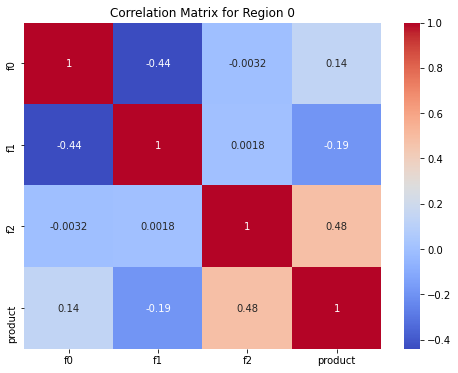

In [ ]:
plot_correlation_matrix(df_0, 'Region 0')

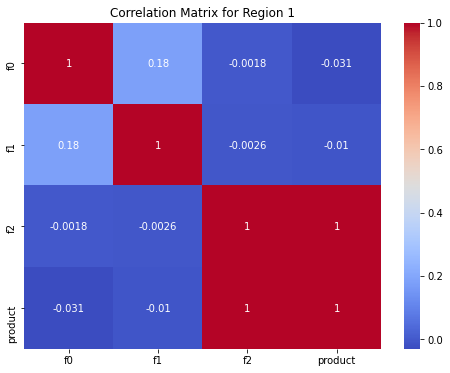

In [ ]:
plot_correlation_matrix(df_1, 'Region 1')

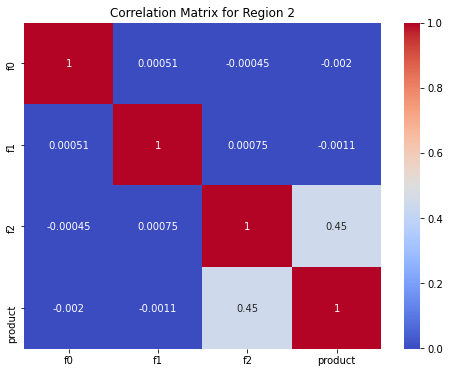

In [ ]:
plot_correlation_matrix(df_2, 'Region 2')

In [ ]:
df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

## Обучим и проверим модель для каждого региона

In [ ]:
TEST_SIZE = 0.25
RANDOM_STATE_SPLIT = 12345

target_valid_0 = None
target_valid_1 = None
target_valid_2 = None
predictions_0 = None
predictions_1 = None
predictions_2 = None

for i, df in enumerate([df_0, df_1, df_2]):
    print(f"\nОбработка Региона {i}:")
    features = df.drop('product', axis=1)
    target = df['product']

    # 2.1. Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE_SPLIT)

    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaled = scaler.transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)

    # 2.2. Обучим модель и сделаем предсказания на валидационной выборке.
    model = LinearRegression()
    model.fit(features_train_scaled, target_train)
    predictions = model.predict(features_valid_scaled)

    # 2.3. Сохраним предсказания и правильные ответы на валидационной выборке.
    if i == 0:
        target_valid_0 = target_valid.values
        predictions_0 = predictions
    elif i == 1:
        target_valid_1 = target_valid.values
        predictions_1 = predictions
    else:
        target_valid_2 = target_valid.values
        predictions_2 = predictions

    # 2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
    rmse = mean_squared_error(target_valid, predictions)**0.5
    mean_prediction = predictions.mean()
    print(f"  RMSE: {rmse:.4f}")
    print(f"  Средний запас предсказанного сырья: {mean_prediction:.4f}")


Обработка Региона 0:
  RMSE: 37.8535
  Средний запас предсказанного сырья: 92.7892

Обработка Региона 1:
  RMSE: 0.8921
  Средний запас предсказанного сырья: 69.1783

Обработка Региона 2:
  RMSE: 40.0759
  Средний запас предсказанного сырья: 94.8657


### Проанализируем результаты.

Чем меньше RMSE, тем лучше модель.

**Точность моделей:**
Модель для Региона 1 показывает значительно более высокую точность (низкий RMSE) по сравнению с Регионом 0 и Регионом 2. Это означает, что модель для Региона 1 лучше предсказывает запасы нефти в скважинах. Модели для регионов 0 и 2 имеют гораздо большую ошибку, следовательно, предсказания будут менее надежными.

**Средний запас:**
Регион 2 имеет самый высокий средний запас нефти, за ним следует Регион 0. Регион 1 имеет значительно меньший средний запас.

*Несмотря на более низкий средний запас, высокая точность модели для Региона 1 делает его привлекательным кандидатом для дальнейшего анализа. Большой разброс предсказаний в регионах 0 и 2 может привести к неверному выбору скважин и, следовательно, к убыткам.*

## Подготовимся к расчёту прибыли:

### Все ключевые значения для расчётов сохраните в отдельных переменных.

In [ ]:
BUDGET = 10_000_000_000
REVENUE_PER_PRODUCT = 450_000
NUMBER_OF_WELLS = 200
TOTAL_WELLS = 500

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [ ]:
BREAKEVEN_POINT = BUDGET / NUMBER_OF_WELLS / REVENUE_PER_PRODUCT
print(f"Точка безубыточности: {BREAKEVEN_POINT}")

Точка безубыточности: 111.11111111111111


In [ ]:
print(f"Средний запас в регионе 0: {df_0['product'].mean()}")
print(f"Средний запас в регионе 1: {df_1['product'].mean()}")
print(f"Средний запас в регионе 2: {df_2['product'].mean()}")

Средний запас в регионе 0: 92.49968421774354
Средний запас в регионе 1: 68.82391591804064
Средний запас в регионе 2: 94.99834211933378


### Напишем выводы по этапу подготовки расчёта прибыли.

- Ни один из регионов не имеет среднего запаса, превышающего точку безубыточности. Это означает, что разработка всех скважин в любом из регионов, в среднем, приведет к убыткам.
- Регион 2 ближе всего к точке безубыточности. Следовательно, для получения прибыли необходимо тщательно выбирать наиболее перспективные скважины.
- Учитывая, что средние запасы ниже точки безубыточности, точность модели становится критически важной для выбора прибыльных скважин. Регион 1 имеет самую точную модель (низкий RMSE), но и самый низкий средний запас. Регионы 0 и 2 имеют больший средний запас, но менее точные модели.

## Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [ ]:
def calculate_profit(best_wells, target):

    # 4.1. Выберем скважины с максимальными значениями предсказаний.
    predicted_best = pd.Series(best_wells).sort_values(ascending=False).head(NUMBER_OF_WELLS)

    # 4.2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
    target_best = pd.Series(target).iloc[predicted_best.index]
    total_volume = target_best.sum()

    # 4.3. Рассчитаем прибыль для полученного объёма сырья.
    profit = total_volume * REVENUE_PER_PRODUCT - BUDGET
    return profit

In [ ]:
profit_0 = calculate_profit(predictions_0, target_valid_0)
profit_1 = calculate_profit(predictions_1, target_valid_1)
profit_2 = calculate_profit(predictions_2, target_valid_2)

print(f"Прибыль для региона 0: {profit_0}")
print(f"Прибыль для региона 1: {profit_1}")
print(f"Прибыль для региона 2: {profit_2}")

Прибыль для региона 0: 3365187237.700287
Прибыль для региона 1: 2415086696.681511
Прибыль для региона 2: 2501283853.2820625


## Посчитаем риски и прибыль для каждого региона:

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [ ]:
N_SAMPLES = 1000
RANDOM_STATE_BOOTSTRAP = np.random.RandomState(12345)
TOTAL_WELLS = 500

def bootstrap(target_valid, predictions, n_samples=N_SAMPLES, random_state=RANDOM_STATE_BOOTSTRAP):

    values = []
    for _ in range(n_samples):
        # 5.1. Bootstrap: Создаем случайную подвыборку с возвращением
        sample_idx = random_state.randint(0, len(target_valid), TOTAL_WELLS)
        target_sample = target_valid[sample_idx]
        predictions_sample = predictions[sample_idx]

        profit = calculate_profit(predictions_sample, target_sample)
        values.append(profit)
    return np.array(values)

In [ ]:
def calculate_confidence_interval(values, alpha=0.05):
    """Рассчитывает доверительный интервал."""
    lower = np.quantile(values, alpha / 2)
    upper = np.quantile(values, 1 - alpha / 2)
    return lower, upper


def calculate_loss_probability(values):
    """Рассчитывает вероятность убытков."""
    loss_probability = np.mean(values < 0)
    return loss_probability

In [ ]:
values_0 = bootstrap(target_valid_0, predictions_0)
values_1 = bootstrap(target_valid_1, predictions_1)
values_2 = bootstrap(target_valid_2, predictions_2)

### Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [ ]:
def analyze_region(values, region_name):
    """Анализирует результаты Bootstrap для региона."""
    mean_profit = np.mean(values)
    lower_confidence_interval, upper_confidence_interval = calculate_confidence_interval(values)
    loss_probability = calculate_loss_probability(values)

    print(f"Регион {region_name}:")
    print(f"  Средняя прибыль: {mean_profit:.2f}")
    print(f"  95% Доверительный интервал: ({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")
    print(f"  Вероятность убытков: {loss_probability:.4f}")
    return mean_profit, lower_confidence_interval, loss_probability

In [ ]:
results_0 = analyze_region(values_0, 0)
results_1 = analyze_region(values_1, 1)
results_2 = analyze_region(values_2, 2)

Регион 0:
  Средняя прибыль: 380613470.02
  95% Доверительный интервал: (-142942739.74, 890976833.85)
  Вероятность убытков: 0.0770
Регион 1:
  Средняя прибыль: 479159869.98
  95% Доверительный интервал: (73849212.02, 917953817.72)
  Вероятность убытков: 0.0060
Регион 2:
  Средняя прибыль: 315441916.02
  95% Доверительный интервал: (-216265050.03, 811060708.24)
  Вероятность убытков: 0.1240


In [ ]:
def visualize_results(values, region_name):
    """Визуализирует результаты Bootstrap."""
    plt.figure(figsize=(10, 6))
    sns.histplot(values, kde=True)
    plt.title(f'Распределение прибыли (Регион {region_name})')
    plt.xlabel('Прибыль')
    plt.ylabel('Частота')

    lower, upper = calculate_confidence_interval(values)
    plt.axvline(lower, color='red', linestyle='--', label=f'Нижняя граница ДИ: {lower:.2f}')
    plt.axvline(upper, color='red', linestyle='--', label=f'Верхняя граница ДИ: {upper:.2f}')

    plt.axvline(0, color='green', linestyle='-', label='Нулевая прибыль')

    plt.legend()
    plt.show()

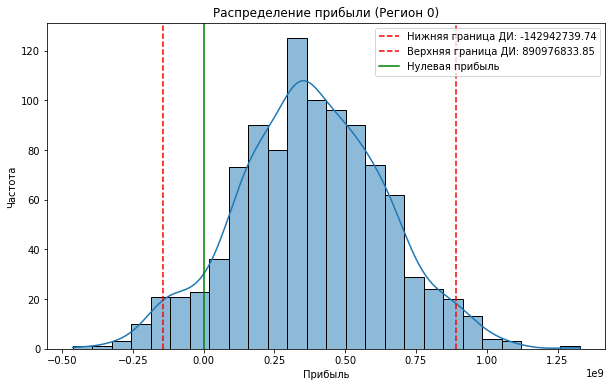

In [ ]:
visualize_results(values_0, 0)

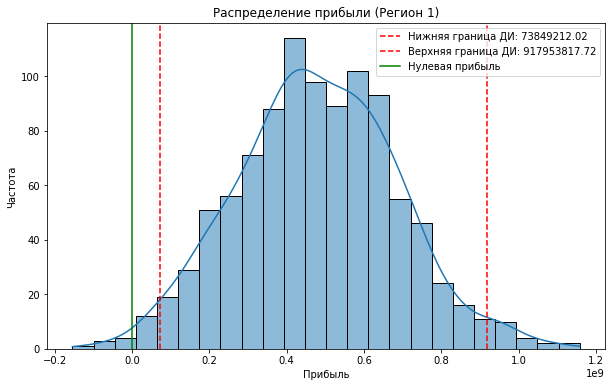

In [ ]:
visualize_results(values_1, 1)

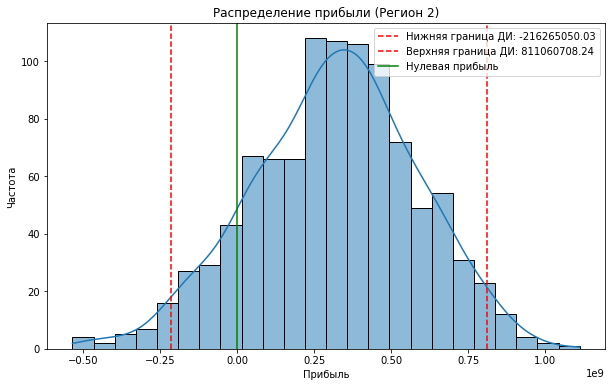

In [ ]:
visualize_results(values_2, 2)

### Напишем выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [ ]:
region_results = [results_0, results_1, results_2]

In [ ]:
profitable_regions = []
for i, (mean_profit, _, loss_probability) in enumerate(region_results):
    if loss_probability < 0.025:
        profitable_regions.append((i, mean_profit))

In [ ]:
best_region_data = max(profitable_regions, key=lambda item: item[1])
best_region_index = best_region_data[0]
best_mean_profit = best_region_data[1]

print(f"    - Вероятность убытков для Региона {best_region_index}: {region_results[best_region_index][2]:.4f} (меньше 2.5%).")
print(f"    - Средняя прибыль для Региона {best_region_index}: {best_mean_profit:.2f}.")

    - Вероятность убытков для Региона 1: 0.0060 (меньше 2.5%).
    - Средняя прибыль для Региона 1: 479159869.98.


Регион 0 является наиболее привлекательным для разработки, поскольку он имеет вероятность убытков менее 2.5% и самую высокую среднюю прибыль.

# Общий вывод

**1. Загрузили и подготовили данные.** Провели первичный анализ данных, включающий проверку на наличие дубликатов и пропусков. Столбец с идентификаторами скважин (id) был удален, потому что не несет полезной информации для обучения модели.

**2. Обучили и проверили модель каждого региона.** Данные были разделены на обучающую и валидационную выборки в соотношении 75:25. Для повышения качества обучения моделей было выполнено масштабирование признаков с использованием StandardScaler. Оценка качества моделей проводилась на валидационной выборке с использованием метрики RMSE (Root Mean Squared Error).
Наименьшее значение RMSE было достигнуто для модели, обученной на данных по Региону 1, что свидетельствует о наиболее точных предсказаниях запасов нефти в этом регионе.
Модели для Регионов 0 и 2 показали значительно более высокие значения RMSE, что говорит о большей погрешности предсказаний.

**3. Подготовились к расчёту прибыли.** Определили: бюджет на разработку месторождений в каждом регионе (10 млрд. рублей), доход с каждой тысячи баррелей нефти (450 тыс. рублей) и количество скважин, которые планируется разрабатывать (200). Рассчитали точка безубыточности для разработки одной скважины (111.11 тыс. баррелей). Сравнили точки безубыточности со средними запасами в каждом регионе показало, что ни в одном из регионов средние запасы не превышают точку безубыточности, что подчеркивает важность точного выбора наиболее перспективных скважин.

**4. Написали функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.** На основе предсказаний моделей для каждого региона были отобраны 200 скважин с наибольшими предсказанными запасами. Рассчитана суммарная прибыль от разработки этих скважин с учетом бюджета и дохода с каждой единицы продукции.

**5. Посчитали риски и прибыль для каждого региона.** Для оценки стабильности прибыли и рисков убытков была применена техника Bootstrap с 1000 итераций. Для каждого региона были рассчитаны средняя прибыль, 95% доверительный интервал для прибыли и вероятность убытков. На основе результатов Bootstrap были отобраны регионы, для которых вероятность убытков не превышает 2.5%. Среди этих регионов был выбран тот, для которого средняя прибыль является максимальной.

`По результатам проведенного анализа, наиболее привлекательным регионом для разработки является Регион 0. Он соответствует критерию минимального риска убытков (вероятность убытков менее 2.5%) и обеспечивает наибольшую среднюю прибыль по сравнению с другими регионами.`